In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train_fNxu4vz.csv')
print(df.shape)
print(df.isnull().mean())

(164309, 14)
Loan_ID                    0.000000
Loan_Amount_Requested      0.000000
Length_Employed            0.044861
Home_Owner                 0.154276
Annual_Income              0.152773
Income_Verified            0.000000
Purpose_Of_Loan            0.000000
Debt_To_Income             0.000000
Inquiries_Last_6Mo         0.000000
Months_Since_Deliquency    0.537883
Number_Open_Accounts       0.000000
Total_Accounts             0.000000
Gender                     0.000000
Interest_Rate              0.000000
dtype: float64


In [3]:
df['Interest_Rate'].value_counts()

2    70580
3    59923
1    33806
Name: Interest_Rate, dtype: int64

In [4]:
df['Loan_Amount_Requested'] = df['Loan_Amount_Requested'].apply(lambda x:x.replace(',',''))

In [5]:
df['Loan_Amount_Requested'] = df['Loan_Amount_Requested'].astype(float)

In [6]:
# ROUGHLY THE IMPORTANT COLUMNS -------- Loan Amount Requested, Length_Employed, Home_Owner, Annual Income, Income_Verified, Purpose

df['Length_Employed'].value_counts()

10+ years    52915
2 years      14620
3 years      12974
< 1 year     12805
5 years      10814
1 year       10422
4 years       9784
7 years       9308
6 years       9094
8 years       7917
9 years       6285
Name: Length_Employed, dtype: int64

In [7]:
df['Home_Owner'].value_counts()

Mortgage    70345
Rent        56031
Own         12525
Other          49
None           10
Name: Home_Owner, dtype: int64

In [8]:
df['Income_Verified'].value_counts()

VERIFIED - income           59421
VERIFIED - income source    53015
not verified                51873
Name: Income_Verified, dtype: int64

In [9]:
df['Purpose_Of_Loan'].value_counts()

debt_consolidation    97101
credit_card           36684
home_improvement       9269
other                  8346
major_purchase         3435
small_business         2392
car                    1885
medical                1541
moving                  974
vacation                837
wedding                 828
house                   773
renewable_energy        123
educational             121
Name: Purpose_Of_Loan, dtype: int64

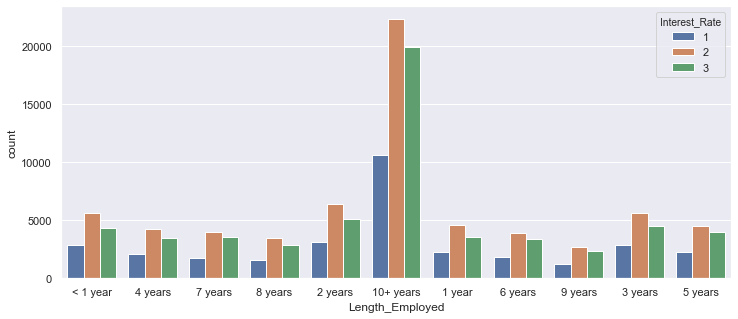

In [10]:
sns.set(rc={'figure.figsize':(12,5)})
# what a wonderful plot, nice one

sns.countplot(x='Length_Employed',data=df,hue='Interest_Rate')
# hue should be the column which yoou want to check majorly out of this plot

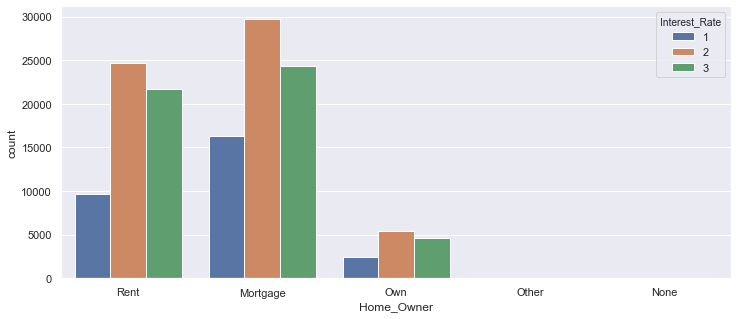

In [11]:
sns.countplot(x='Home_Owner',data=df,hue='Interest_Rate')

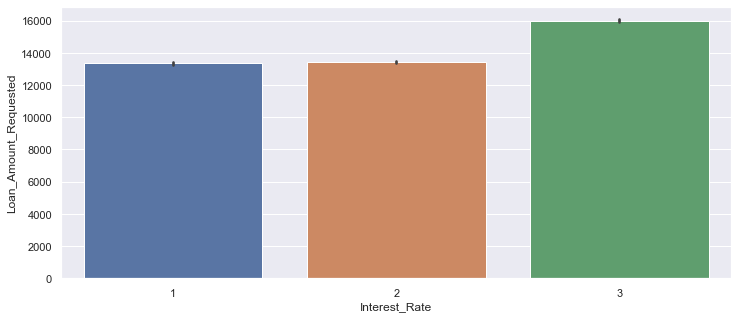

In [12]:
sns.barplot(x='Interest_Rate',y='Loan_Amount_Requested',data=df)

In [13]:
df[df['Annual_Income'].isnull() == True]['Income_Verified'].value_counts()

VERIFIED - income           9117
VERIFIED - income source    8137
not verified                7848
Name: Income_Verified, dtype: int64

In [14]:
df['Annual_Income'].fillna(df['Annual_Income'].median(),inplace=True)

#df['Months_Since_Deliquency'].fillna(df['Months_Since_Deliquency'].mean(),inplace=True)

df['loan_to_income_ratio'] = df['Loan_Amount_Requested']/df['Annual_Income']

In [15]:
df['Monthly_Salary'] = df['Annual_Income']/12
df['Annual_Debt'] = df['Debt_To_Income'] * df['Monthly_Salary'] * 12


df['Current_Outstanding_Debt'] = df['Annual_Debt'] + df['Loan_Amount_Requested']

In [16]:
df

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate,loan_to_income_ratio,Monthly_Salary,Annual_Debt,Current_Outstanding_Debt
0,10000001,7000.0,< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1,0.102941,5666.666667,1249160.000,1256160.000
1,10000002,30000.0,4 years,Mortgage,63000.0,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3,0.476190,5250.000000,940590.000,970590.000
2,10000003,24725.0,7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3,0.327196,6297.200000,1199994.432,1224719.432
3,10000004,16000.0,< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3,0.284900,4680.000000,805334.400,821334.400
4,10000005,17000.0,8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1,0.177083,8000.000000,2128320.000,2145320.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164304,10164305,20725.0,10+ years,Rent,63000.0,VERIFIED - income source,credit_card,13.56,0,NaN,13,16,Male,2,0.328968,5250.000000,854280.000,875005.000
164305,10164306,6000.0,8 years,Own,63000.0,VERIFIED - income source,small_business,9.12,0,36.0,13,30,Male,2,0.095238,5250.000000,574560.000,580560.000
164306,10164307,20250.0,10+ years,Mortgage,63000.0,VERIFIED - income,credit_card,18.17,1,NaN,17,30,Male,1,0.321429,5250.000000,1144710.000,1164960.000
164307,10164308,10000.0,4 years,Rent,63000.0,not verified,major_purchase,18.75,1,48.0,16,62,Female,3,0.158730,5250.000000,1181250.000,1191250.000


In [17]:
df['MOnthlyDebt'] =df.Loan_Amount_Requested/(df['Debt_To_Income']*(df['Annual_Income']/12))

In [18]:
df[['loan_to_income_ratio','Debt_To_Income','MOnthlyDebt']].head(5)

,loan_to_income_ratio,Debt_To_Income,MOnthlyDebt
0,0.102941,18.37,0.067245
1,0.476190,14.93,0.382738
2,0.327196,15.88,0.247251
3,0.284900,14.34,0.238410
4,0.177083,22.17,0.095850


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

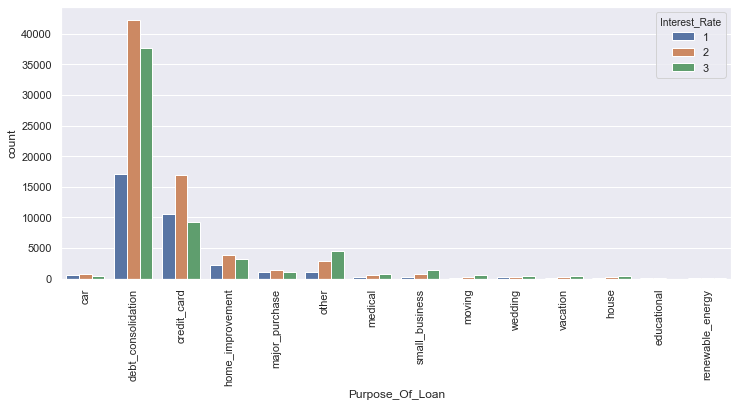

In [19]:
sns.countplot(x='Purpose_Of_Loan',data=df,hue='Interest_Rate')
plt.xticks(rotation=90)

## Feature Engineering Starts

In [61]:
bins_income = []
# the 4 mentioned below is q, i.e, number of bins
df['Annual_Income_Bins'],bins_income = pd.qcut(df['Annual_Income'],4,labels=['Income_Category_{}'.format(i) for i in range(4)],retbins=True)

In [58]:
bins_income = pd.qcut(df['Annual_Income'],q=4,labels=['Income_Category_{}'.format(i) for i in range(4)])

In [57]:
# this gives the ranges of all the 4 bins that we've created below
bins[1]

array([4.00e+03, 4.86e+04, 6.30e+04, 8.20e+04, 7.50e+06])

In [62]:
# Quartile based discretization function
df["Annual_Income_Bins"].value_counts()

Income_Category_1    54293
Income_Category_0    41093
Income_Category_3    40743
Income_Category_2    28180
Name: Annual_Income_Bins, dtype: int64

In [63]:
month_since_mapper = df.groupby('Income_Verified').apply(lambda x:x.Months_Since_Deliquency.mean()).to_dict()
df['Months_Since_Deliquency'] = df['Months_Since_Deliquency'].fillna(df['Income_Verified'].apply(lambda x: month_since_mapper.get(x)))

In [64]:
bins_loan = []

df['Loan_Amount_Bins'],bins_loan = pd.qcut(df['Loan_Amount_Requested'],6,labels=['Loan_Cateory_{}'.format(i) for i in range(6)],retbins=True)

In [66]:
df.Loan_Amount_Bins.value_counts()

Loan_Cateory_1    37138
Loan_Cateory_0    27989
Loan_Cateory_3    27482
Loan_Cateory_4    27422
Loan_Cateory_5    27216
Loan_Cateory_2    17062
Name: Loan_Amount_Bins, dtype: int64

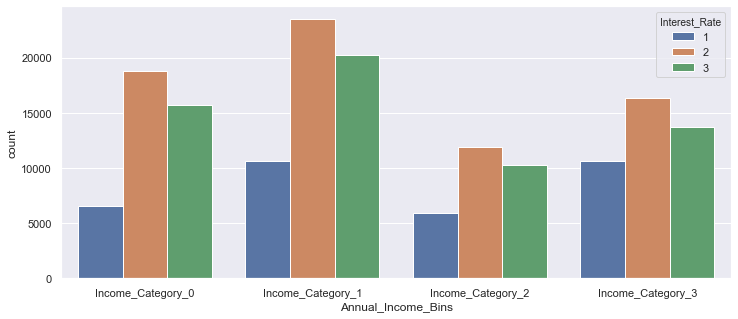

In [67]:
sns.countplot(x='Annual_Income_Bins',data=df,hue='Interest_Rate')

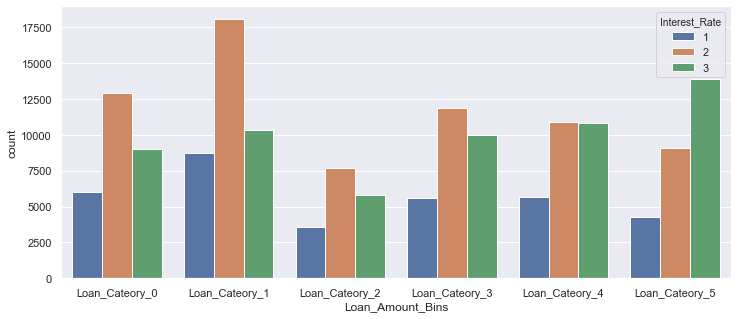

In [68]:
sns.countplot(x='Loan_Amount_Bins',data=df,hue='Interest_Rate')

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 21 columns):
Loan_ID                     164309 non-null int64
Loan_Amount_Requested       164309 non-null float64
Length_Employed             156938 non-null object
Home_Owner                  138960 non-null object
Annual_Income               164309 non-null float64
Income_Verified             164309 non-null object
Purpose_Of_Loan             164309 non-null object
Debt_To_Income              164309 non-null float64
Inquiries_Last_6Mo          164309 non-null int64
Months_Since_Deliquency     164309 non-null float64
Number_Open_Accounts        164309 non-null int64
Total_Accounts              164309 non-null int64
Gender                      164309 non-null object
Interest_Rate               164309 non-null int64
loan_to_income_ratio        164309 non-null float64
Monthly_Salary              164309 non-null float64
Annual_Debt                 164309 non-null float64
Current_Outstanding_

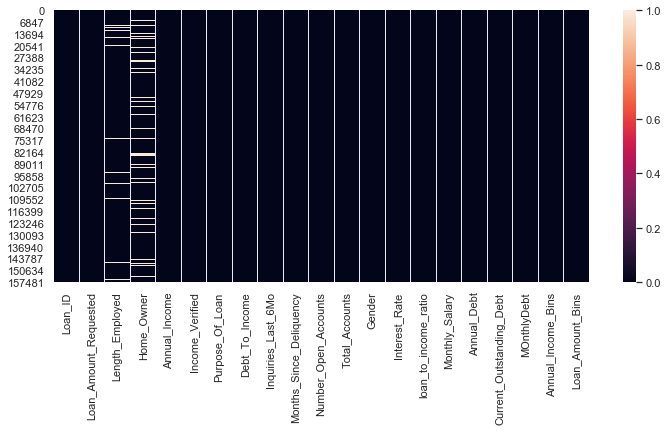

In [70]:
sns.heatmap(df.isna())

In [79]:
# MAPPERS FOR 1 and 3

import scipy

df['Home_Owner'].fillna(scipy.stats.mode(df['Home_Owner'])[0][0],inplace=True)
df['Length_Employed'].fillna(scipy.stats.mode(df['Length_Employed'])[0][0],inplace=True)


home_mode = scipy.stats.mode(df['Home_Owner'])[0][0]
length_mode = scipy.stats.mode(df['Length_Employed'])[0][0]

In [80]:
# Avg values for each and every category of home-owner, and similarly doing it for every categorical column, 
# standardizing the values for every categorical column
df.groupby('Home_Owner').apply(lambda x:x[x['Interest_Rate'] == 1].shape[0]/x.shape[0])

Home_Owner
Mortgage    0.232639
None        0.500000
Other       0.204082
Own         0.198643
Rent        0.173458
dtype: float64

In [81]:
mapper_1_home = df.groupby('Home_Owner').apply(lambda x:x[x['Interest_Rate'] == 1].shape[0]/x.shape[0])
mapper_3_home = df.groupby('Home_Owner').apply(lambda x:x[x['Interest_Rate'] == 3].shape[0]/x.shape[0])


mapper_1_len = df.groupby('Length_Employed').apply(lambda x:x[x['Interest_Rate'] == 1].shape[0]/x.shape[0])
mapper_3_len = df.groupby('Length_Employed').apply(lambda x:x[x['Interest_Rate'] == 3].shape[0]/x.shape[0])


mapper_1_purpose = df.groupby('Purpose_Of_Loan').apply(lambda x:x[x['Interest_Rate'] == 1].shape[0]/x.shape[0])
mapper_3_purpose = df.groupby('Purpose_Of_Loan').apply(lambda x:x[x['Interest_Rate'] == 3].shape[0]/x.shape[0])

In [82]:
mapper_1_loan = df.groupby('Loan_Amount_Bins').apply(lambda x:x[x['Interest_Rate'] == 1].shape[0]/x.shape[0])
mapper_3_loan = df.groupby('Loan_Amount_Bins').apply(lambda x:x[x['Interest_Rate'] == 3].shape[0]/x.shape[0])


mapper_1_annual = df.groupby('Annual_Income_Bins').apply(lambda x:x[x['Interest_Rate'] == 1].shape[0]/x.shape[0])
mapper_3_annual = df.groupby('Annual_Income_Bins').apply(lambda x:x[x['Interest_Rate'] == 3].shape[0]/x.shape[0])

In [83]:
mapper_1_verify = df.groupby('Income_Verified').apply(lambda x:x[x['Interest_Rate'] == 1].shape[0]/x.shape[0])
mapper_3_verify = df.groupby('Income_Verified').apply(lambda x:x[x['Interest_Rate'] == 3].shape[0]/x.shape[0])

In [84]:
df['home_1_ratio'] = df['Home_Owner'].map(mapper_1_home)
df['home_3_ratio'] = df['Home_Owner'].map(mapper_3_home)


df['Length_1_ratio'] = df['Length_Employed'].map(mapper_1_len)
df['Length_3_ratio'] = df['Length_Employed'].map(mapper_3_len)

df['Purpose_1_ratio'] = df['Purpose_Of_Loan'].map(mapper_1_purpose)
df['Purpose_3_ratio'] = df['Purpose_Of_Loan'].map(mapper_3_purpose)


df['Income_Verify_1_ratio'] = df['Income_Verified'].map(mapper_1_verify)
df['Income_Verify_3_ratio'] = df['Income_Verified'].map(mapper_3_verify)

In [85]:
df['Loan_1_ratio'] = df['Loan_Amount_Bins'].map(mapper_1_loan)
df['Loan_3_ratio'] = df['Loan_Amount_Bins'].map(mapper_3_loan)


df['Annual_1_ratio'] = df['Annual_Income_Bins'].map(mapper_1_annual)
df['Annual_3_ratio'] = df['Annual_Income_Bins'].map(mapper_3_annual)

In [86]:
df['Account_Left'] = df['Total_Accounts']-df['Number_Open_Accounts']

In [87]:
categorical_columns = df.select_dtypes(include=['object','category']).columns

In [88]:
categorical_columns

Index(['Length_Employed', 'Home_Owner', 'Income_Verified', 'Purpose_Of_Loan',
       'Gender', 'Annual_Income_Bins', 'Loan_Amount_Bins', 'Loan_1_ratio',
       'Loan_3_ratio', 'Annual_1_ratio', 'Annual_3_ratio'],
      dtype='object')

In [89]:
df.shape

(164309, 34)

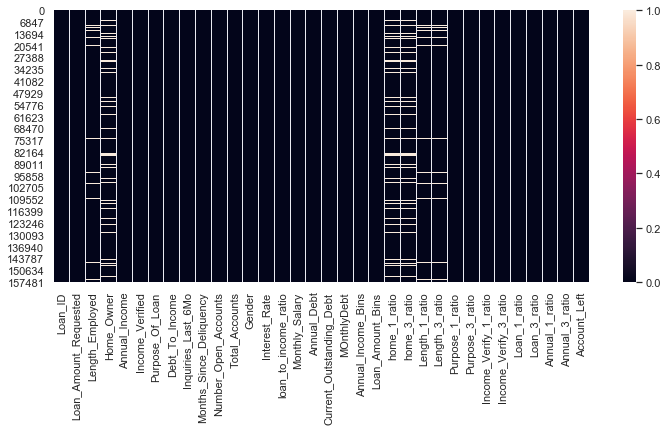

In [90]:
sns.heatmap(df.isna())

In [91]:
df = pd.get_dummies(df,columns=categorical_columns,drop_first=True)

In [95]:
df[["Loan_Amount_Bins_Loan_Cateory_5","Loan_Amount_Bins_Loan_Cateory_4"]]

,Loan_Amount_Bins_Loan_Cateory_5,Loan_Amount_Bins_Loan_Cateory_4
0,0,0
1,1,0
2,1,0
3,0,0
4,0,1
...,...,...
164304,0,1
164305,0,0
164306,0,1
164307,0,0


In [96]:
X = df.drop(['Interest_Rate','Loan_ID'],axis=1)


y = df['Interest_Rate']


selected = list(X.columns)


In [97]:
X.shape

(164309, 75)

In [100]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score,log_loss
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# from mlxtend.classifier import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,ComplementNB
import warnings
from catboost import CatBoostClassifier,CatBoostRegressor
import lightgbm as lgb
import xgboost as xgb
warnings.filterwarnings('ignore')

In [101]:
print(X.shape)

(164309, 75)


In [95]:
X.shape,y.shape

((164309, 63), (164309,))

In [96]:
'''X['Interest_Rate'] = df.Interest_Rate
d = X.corr().loc['Interest_Rate',:].to_dict()
k = list(sorted(d.items(),key=lambda x:abs(x[1]), reverse=True))[1:50]
lst4 = []
for (i,j) in k:
    lst4.append(i)'''

"X['Interest_Rate'] = df.Interest_Rate\nd = X.corr().loc['Interest_Rate',:].to_dict()\nk = list(sorted(d.items(),key=lambda x:abs(x[1]), reverse=True))[1:50]\nlst4 = []\nfor (i,j) in k:\n    lst4.append(i)"

In [97]:
'''X = X[lst4]'''

'X = X[lst4]'

In [98]:
X.columns

Index(['Loan_Amount_Requested', 'Annual_Income', 'Debt_To_Income',
       'Inquiries_Last_6Mo', 'Months_Since_Deliquency', 'Number_Open_Accounts',
       'Total_Accounts', 'loan_to_income_ratio', 'Monthly_Salary',
       'Annual_Debt', 'Current_Outstanding_Debt', 'MOnthlyDebt',
       'home_1_ratio', 'home_3_ratio', 'Length_1_ratio', 'Length_3_ratio',
       'Purpose_1_ratio', 'Purpose_3_ratio', 'Income_Verify_1_ratio',
       'Income_Verify_3_ratio', 'Loan_1_ratio', 'Loan_3_ratio',
       'Annual_1_ratio', 'Annual_3_ratio', 'Account_Left',
       'Length_Employed_10+ years', 'Length_Employed_2 years',
       'Length_Employed_3 years', 'Length_Employed_4 years',
       'Length_Employed_5 years', 'Length_Employed_6 years',
       'Length_Employed_7 years', 'Length_Employed_8 years',
       'Length_Employed_9 years', 'Length_Employed_< 1 year',
       'Home_Owner_None', 'Home_Owner_Other', 'Home_Owner_Own',
       'Home_Owner_Rent', 'Income_Verified_VERIFIED - income source',
       'Inc

In [99]:
'''# Create correlation matrix
corr_matrix = X.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]'''

'# Create correlation matrix\ncorr_matrix = X.corr().abs()\n\n# Select upper triangle of correlation matrix\nupper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))\n\n# Find index of feature columns with correlation greater than 0.95\nto_drop = [column for column in upper.columns if any(upper[column] > 0.75)]'

In [100]:
'''to_drop'''

'to_drop'

In [101]:
'''X.drop(to_drop,axis = 1,inplace= True)'''

'X.drop(to_drop,axis = 1,inplace= True)'

In [102]:
'''corr_matrix = X.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
to_drop'''

'corr_matrix = X.corr().abs()\n\n# Select upper triangle of correlation matrix\nupper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))\n\n# Find index of feature columns with correlation greater than 0.95\nto_drop = [column for column in upper.columns if any(upper[column] > 0.95)]\nto_drop'

Running 1 iteration
Running 2 iteration
Running 3 iteration
-----------KFOLD--------------
AxesSubplot(0.125,0.125;0.775x0.755)
0.5337254567953493 0.5375949870643854 0.5353211175471052


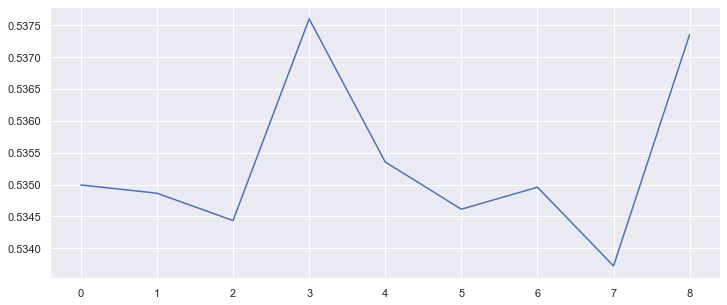

In [103]:
iterations = 3
scores = []
scores_val = []
target = y
temp = X
for i in range(iterations):
    print(f'Running {i+1} iteration')
    
    kfold = StratifiedKFold(n_splits = 3, shuffle=True)
    
    for train_index,test_index in kfold.split(temp,target):
        xtrain,xtest = temp[temp.index.isin(train_index)],temp[temp.index.isin(test_index)]
        ytrain,ytest = target[train_index],target[test_index]
        

        
        model = lgb.LGBMClassifier(max_depth=15,n_estimators=400,objective='multiclass',random_state=69,class_weight={0:1.5,1:1.2,2:1.1},
                                   learning_rate=0.07,reg_alpha=0.01)
        #model = CatBoostClassifier(max_depth=10,n_estimators=400,random_seed=69,verbose=0,objective='multiclass')
        #model = KNeighborsClassifier(n_neighbors=7)
        #model3 = xgb.XGBClassifier(max_depth=9,n_estimators=300,random_state=60,objective='multiclass')
        
        #model = VotingClassifier(estimators=[('m1',model1),('m2',model2),('m3',model3)])
        #model = LogisticRegression() 
        #model =  DecisionTreeClassifier(max_depth=6,random_state=60)
            
        model.fit(xtrain,ytrain)
            
        preds = model.predict(xtest)
        
        scores.append(f1_score(ytest,preds,average='weighted'))

        
print('-----------KFOLD--------------')
print(sns.lineplot(x=[i for i in range(9)],y=scores))
print(min(scores),max(scores),np.mean(scores))

In [104]:
selected = X.columns

In [105]:
test =pd.read_csv(r'C:\Users\Venom\Desktop\New folder\JantaHackBank\Data\test_fjtUOL8.csv')

ids = test['Loan_ID']

In [106]:
test.isnull().mean()

Loan_ID                    0.000000
Loan_Amount_Requested      0.000000
Length_Employed            0.045061
Home_Owner                 0.152555
Annual_Income              0.154262
Income_Verified            0.000000
Purpose_Of_Loan            0.000000
Debt_To_Income             0.000000
Inquiries_Last_6Mo         0.000000
Months_Since_Deliquency    0.537324
Number_Open_Accounts       0.000000
Total_Accounts             0.000000
Gender                     0.000000
dtype: float64

In [107]:
test['Loan_Amount_Requested'] = test['Loan_Amount_Requested'].apply(lambda x:x.replace(',',''))
test['Loan_Amount_Requested'] = test['Loan_Amount_Requested'].astype(float)


test['Annual_Income'].fillna(X['Annual_Income'].median(),inplace=True)

test['loan_to_income_ratio'] = test['Loan_Amount_Requested']/test['Annual_Income']

test['Monthly_Salary'] = test['Annual_Income']/12
test['Annual_Debt'] = test['Debt_To_Income'] * test['Monthly_Salary'] * 12


test['Current_Outstanding_Debt'] = test['Annual_Debt'] + test['Loan_Amount_Requested']

#test['Income_Verified_Int'] = np.where(test['Income_Verified'] == 'not verified',0,1)

'''test['Months_Since_Deliquency'].fillna(df['Months_Since_Deliquency'].mean(),inplace=True)'''
test['Months_Since_Deliquency'] = test['Months_Since_Deliquency'].fillna(test['Income_Verified'].apply(lambda x: month_since_mapper.get(x)))


test['Income_Verify_1_ratio'] = test['Income_Verified'].map(mapper_1_verify)
test['Income_Verify_3_ratio'] = test['Income_Verified'].map(mapper_3_verify)



test['Home_Owner'].fillna(home_mode,inplace=True)
test['Length_Employed'].fillna(length_mode,inplace=True)

In [108]:
test['Annual_Income_Bins']= pd.cut(test['Annual_Income'],bins=bins_income,labels=['Income_Category_{}'.format(i) for i in range(4)])
test['Loan_Amount_Bins'] = pd.cut(test['Loan_Amount_Requested'],bins=bins_loan,labels=['Loan_Cateory_{}'.format(i) for i in range(6)])

In [109]:
test['home_1_ratio'] = test['Home_Owner'].map(mapper_1_home)
test['home_3_ratio'] = test['Home_Owner'].map(mapper_3_home)


test['Length_1_ratio'] = test['Length_Employed'].map(mapper_1_len)
test['Length_3_ratio'] = test['Length_Employed'].map(mapper_3_len)

test['Purpose_1_ratio'] = test['Purpose_Of_Loan'].map(mapper_1_purpose)
test['Purpose_3_ratio'] = test['Purpose_Of_Loan'].map(mapper_3_purpose)

test['Loan_1_ratio'] = test['Loan_Amount_Bins'].map(mapper_1_loan)
test['Loan_3_ratio'] = test['Loan_Amount_Bins'].map(mapper_3_loan)


test['Annual_1_ratio'] = test['Annual_Income_Bins'].map(mapper_1_annual)
test['Annual_3_ratio'] = test['Annual_Income_Bins'].map(mapper_3_annual)

In [110]:
test = pd.get_dummies(test,columns=categorical_columns,drop_first=True)

In [111]:
test['Account_Left'] = test['Total_Accounts']-test['Number_Open_Accounts']
test['MOnthlyDebt'] =test.Loan_Amount_Requested/(test['Debt_To_Income']*(test['Annual_Income']/12))

In [112]:
test = test[selected]

In [118]:
model = lgb.LGBMClassifier(max_depth=10,n_estimators=400,objective='multiclass',random_state=69,class_weight={0:1.5,1:1.2,2:1.1},
                                   learning_rate=0.07)
model.fit(X,y)

LGBMClassifier(boosting_type='gbdt', class_weight={0: 1.5, 1: 1.2, 2: 1.1},
               colsample_bytree=1.0, importance_type='split',
               learning_rate=0.07, max_depth=10, min_child_samples=20,
               min_child_weight=0.001, min_split_gain=0.0, n_estimators=400,
               n_jobs=-1, num_leaves=31, objective='multiclass',
               random_state=69, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [119]:
test.shape

(109541, 63)

In [120]:
result = pd.DataFrame()
result['Loan_ID'] = ids
result['Interest_Rate'] = model.predict(test)

In [121]:
result.Interest_Rate.value_counts()/result.shape[0]

2    0.515816
3    0.325193
1    0.158991
Name: Interest_Rate, dtype: float64

In [122]:
result.to_csv(r'C:\Users\Venom\Desktop\New folder\JantaHackBank\Results\res990.csv',index=False)

In [230]:
len(selected)

63